이미지 전처리 코드

In [2]:
# 모듈 설치
!pip install opencv_python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image shape: (1300, 1300, 3)


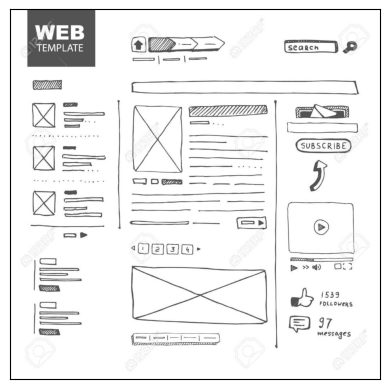

In [14]:
# 이미지 불러오기
image_path = "example2.jpg"
image = cv2.imread(image_path)

print("image shape:", image.shape)
plt.imshow(image)
plt.xticks([]), plt.yticks([]) 
plt.show()

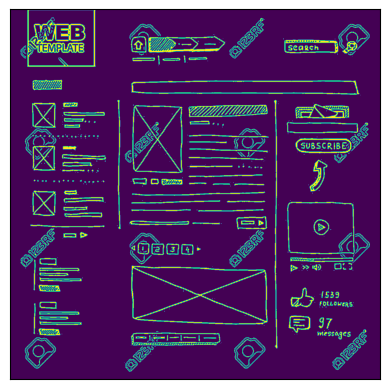

In [15]:
b, g, r = cv2.split(image)

b_blurred = cv2.GaussianBlur(b, (5, 5), 0)
g_blurred = cv2.GaussianBlur(g, (5, 5), 0)
r_blurred = cv2.GaussianBlur(r, (5, 5), 0)

b_binary = cv2.adaptiveThreshold(b_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
g_binary = cv2.adaptiveThreshold(g_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
r_binary = cv2.adaptiveThreshold(r_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

combined_binary = cv2.bitwise_or(cv2.bitwise_or(b_binary, g_binary), r_binary)

plt.imshow(combined_binary)
plt.xticks([]), plt.yticks([]) 
plt.show()

image shape: (1300, 1300, 3)


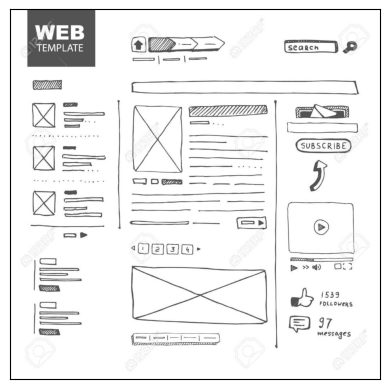

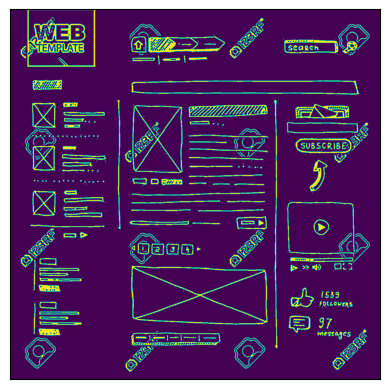

In [27]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
morphed = cv2.morphologyEx(combined_binary, cv2.MORPH_CLOSE, kernel)


print("image shape:", image.shape)
plt.imshow(image)
plt.xticks([]), plt.yticks([]) 
plt.show()

plt.imshow(morphed)
plt.xticks([]), plt.yticks([]) 
plt.show()

이미지 전처리 코드 - 함수화

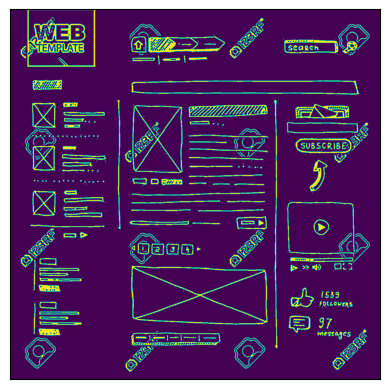

In [30]:
import cv2
import numpy as np

# 이미지 불러오기
image_path = "example2.jpg"
image = cv2.imread(image_path)

def preprocessing(image):
    b, g, r = cv2.split(image)

    b_blurred = cv2.GaussianBlur(b, (5, 5), 0)
    g_blurred = cv2.GaussianBlur(g, (5, 5), 0)
    r_blurred = cv2.GaussianBlur(r, (5, 5), 0)
    
    b_binary = cv2.adaptiveThreshold(b_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    g_binary = cv2.adaptiveThreshold(g_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    r_binary = cv2.adaptiveThreshold(r_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    combined_binary = cv2.bitwise_or(cv2.bitwise_or(b_binary, g_binary), r_binary) # rgb별 처리

    # 모폴로지 연산으로 노이즈 제거 및 텍스트 영역 강화
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    morphed = cv2.morphologyEx(combined_binary, cv2.MORPH_CLOSE, kernel)

    return image, morphed


image, ss = preprocessing(image)
plt.imshow(ss)
plt.xticks([]), plt.yticks([]) 
plt.show()